In [7]:
import matplotlib.pyplot as plt
plt.ion()
%load_ext autoreload
%autoreload 2
from PIL import *
import os
from oop.src.shapes import circle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'circle'

In [6]:
!ls

'Assessment 1.ipynb'
'BootCamp Master Notes.ipynb'
'Bootcamp Warmups.ipynb'
 Desktop
 Documents
 Downloads
 dsi-assessment-day1
 DSI_Lectures
 dsi-warmups
 examples.desktop
 matplotlib
'Morning Assignment Day 3 Drawing Shapes Pillow.ipynb'
 Music
 oop
 opencv
 opencv_contrib
 pandas
 Pandas.ipynb
 Pictures
 Public
 rootkey.csv
 snap
 Templates
 transformers
 Untitled.ipynb
 Videos
'Warm up Day 3 Pandas Salary.ipynb'


In [11]:
from shapes.py import circle

ModuleNotFoundError: No module named 'shapes'

In [18]:
a,b, c = (100,100, 50, (255,0,0))[0:3]

In [20]:
import math

class Circle():
    """A circular shape as defined by a center point and radius.
    This shape is designed to be drawn using SimpleGUI (see simplegui.py).

    Parameters
    ----------
    cx      : {int} x coordinate of the center point
    cy      : {int} y coordinate of the center point
    radius  : {int} radius of the circle
    color   : {tuple} of (r,g,b) coordinates
    """
    def __init__(self, cx, cy, radius, color):
        """Constructs a Circle instance
        centered around (cx,cy) with given radius and color.
        """
        self.cx = cx
        self.cy = cy
        self.radius = radius
        self.color = color

    def mu(self, x, y):
        """Characteristic function of the shape.
        Returns True if (x,y) is inside the shape, else False.

        Parameters
        ----------
        x : {int} x coordinate of a pixel
        y : {int} y coordinate of a pixel

        Returns
        -------
        bool : True or False whether (x,y) is within the shape.
        """
        t_dist = math.sqrt((x - self.cx)**2 + (y - self.cy)**2)
        return (t_dist < self.radius)


class Rectangle():
    """A rectangular shape as defined by two extreme pixels points
    (one upper-left, one lower-right).
    This shape is designed to be drawn using SimpleGUI (see simplegui.py).

    Parameters
    ----------
    x0      : {int} x coordinate of the top-left point
    y0      : {int} y coordinate of the top-left point
    x1      : {int} x coordinate of the bottom-right point
    y1      : {int} y coordinate of the bottom-right point
    color   : {tuple} of (r,g,b) coordinates
    """
    def __init__(self, x0, y0, x1, y1, color):
        """Constructs a Rectangle instance
        with top-left point (x0,y0), bottom-right (x1,y1) and color.
        """
        self.cx0 = x0
        self.cy0 = y0
        self.cx1 = x1
        self.cy1 = y1
        self.color = color

    def mu(self, x, y):
        """Characteristic function of the shape.
        Returns True if (x,y) is inside the shape, else False.

        Parameters
        ----------
        x : {int} x coordinate of a pixel
        y : {int} y coordinate of a pixel

        Returns
        -------
        bool : True or False whether (x,y) is within the shape.
        """
        if (x > self.cx0 and x < self.cx1 and y > self.cy0 and y < self.cy1):
            return True
        else:
            return False


In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

class SimpleGUI():
    """A Graphical User Interface using matploblib to display
    shapes using their characteristic function.

    Each shape is represented by a class with a color and a characteristic
    function (method) mu(). For displaying shapes, this class

    Parameters
    ----------
    None

    Attributes
    ----------
    width  : {int} the width of the image generated
        and the maximum value for x coordinates of pixels.
    height : {int} the height of the image generated
        and the maximum value for y coordinates of pixels.
    pixels : the matrix of colors for each pixel (to generate img)
    img    : {PIL.Image} the image generated for display.
    """
    def __init__(self):
        self.width = 640
        self.height = 480
        self.img = None
        self.pixels = None
        self.clear()

    def show(self):
        """Shows the current image on display (uses matplotlib).
        Uses attribute img, transforms it into an array
        and use plt.imshow() to display it.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        plt.imshow(np.asarray(self.img), aspect='equal')
        plt.axis('off')
        plt.show()

    def clear(self):
        """ Resets the image to white, draw a black border around.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        self.img = Image.new( 'RGB', (self.width, self.height), "white" )
        self.pixels = self.img.load()
        # horizontal borders
        for i in range(self.width):
            self.pixels[i,0] = (0, 0, 0)
            self.pixels[i,self.height-1] = (0, 0, 0)
        # vertical borders
        for j in range(self.height):
            self.pixels[0,j] = (0, 0, 0)
            self.pixels[self.width-1,j] = (0, 0, 0)

    def test(self):
        """Displays a test image.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        self.clear()
        for i in range(self.width):
            for j in range(self.height):
                self.pixels[i,j] = (i % 255, j % 255, 128)
        self.show()

    def draw(self, shape_list):
        """Draw a list of shapes as defined in module shapes.py
        and show() the result.

        Parameters
        ----------
        shape_list : a {list} of shapes

        Returns
        -------
        None
        """
        # clears the image
        self.clear()

        # checks for every pixel in the image
        for i in range(self.width):
            for j in range(self.height):
                # if we are in one of the areas in the list
                for o in shape_list:
                    if o.mu(i,j):
                        # drop a pixel in there, using color of the area
                        self.pixels[i,j] = o.color

        # systematically show the resulting image
        self.show()

In [24]:
circle1 = Circle(100,100, 50, (255,0,0))
circle2 = Circle(200,100, 70, (0,255,0))
circle3 = Circle(100,200, 10, (0,0,255))

In [25]:
print("inside 0, 0")
print(Circle.mu(circle1, 0,0))
print("inside 100, 70")
print(Circle.mu(circle1, 100,70))
print("inside 300, 20")
print(Circle.mu(circle1, 300,20))

inside 0, 0
False
inside 100, 70
True
inside 300, 20
False


In [26]:
gui = SimpleGUI()

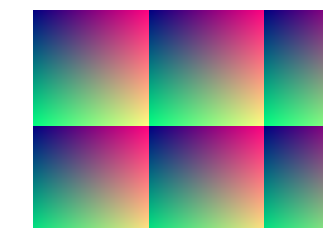

In [27]:
gui.test()

In [28]:
shapelist = [circle1, circle2, circle3]

In [79]:
import math

class UnionShape():
    '''
    The union of two shapes will return true on points that belong to shape_a or shape_b
    '''

    def __init__(self, shape_a, shape_b):
        self.shape_a = shape_a
        self.shape_b = shape_b

    def color_avg(self):
        color_avg = (self.shape_a.color + self.shape_b.color)/2
        return color_avg

    def mu(self,x,y):
        """Characteristic function of the shape.
        Returns True if shape_a is inside shape_b, else False.

        Returns
        -------
        bool : True or False whether shape_a is within shape_b.
        """
        utest = (self.shape_a.mu(x,y) or self.shape_b.mu(x,y), self.shape_a.color)
        return utest

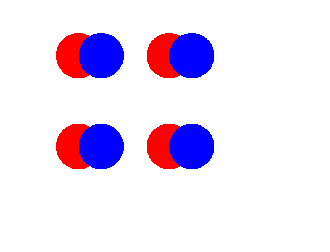

In [64]:
gui = SimpleGUI()

circle1 = Circle(100, 100, 50, (255, 0, 0))
circle2 = Circle(150, 100, 50, (0, 0, 255))

circle3 = Circle(300, 100, 50, (255, 0, 0))
circle4 = Circle(350, 100, 50, (0, 0, 255))

circle5 = Circle(100, 300, 50, (255, 0, 0))
circle6 = Circle(150, 300, 50, (0, 0, 255))

circle7 = Circle(300, 300, 50, (255, 0, 0))
circle8 = Circle(350, 300, 50, (0, 0, 255))

shapelist = [circle1, circle2,
            circle3, circle4,
            circle5, circle6,
            circle7, circle8]

gui.draw(shapelist)



In [80]:
UnionShape.mu(circle1, circle2)


TypeError: mu() missing 1 required positional argument: 'y'